In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('F:\\Jupyter Notebooks\\TelecoCustomerChurn\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.drop(['customerID'], axis = 1, inplace = True) # There is no need of "customerID" in prediction

In [7]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
# we can use astype but "to_numeric" function converts blank/space into NaN and astype does not

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [10]:
data['TotalCharges'].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [11]:
data.dropna(inplace = True)

In [12]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
tenure_churn_yes = data[data['Churn'] == 'Yes'].tenure
tenure_churn_no = data[data['Churn'] == 'No'].tenure
tenure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

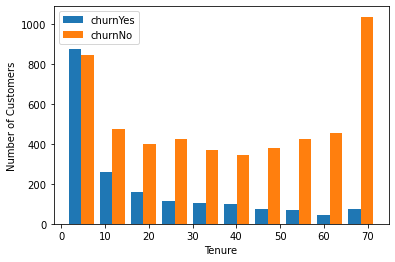

In [15]:
plt.hist([tenure_churn_yes,tenure_churn_no], label = ['churnYes', 'churnNo'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend()

In [16]:
MC_churn_yes = data[data['Churn'] == 'Yes'].MonthlyCharges
MC_churn_no = data[data['Churn'] == 'No'].MonthlyCharges

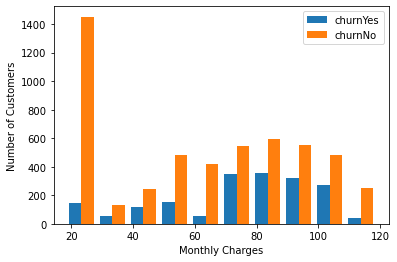

In [17]:
plt.hist([MC_churn_yes,MC_churn_no], label = ['churnYes', 'churnNo'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.legend()

In [18]:
data.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
# find the unique values in each column
def Find_unique_val(data):
    for col in data.keys():
        print(col,': ',data[col].unique())


In [20]:
data['OnlineSecurity'].replace({'No internet service' : 'No'}, inplace = True)

In [21]:
for col in data.keys():
    if data[col].dtypes == 'object':
        data[col].replace({'No internet service' : 'No'}, inplace = True)

In [22]:
Find_unique_val(data)

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes']
OnlineBackup :  ['Yes' 'No']
DeviceProtection :  ['No' 'Yes']
TechSupport :  ['No' 'Yes']
StreamingTV :  ['No' 'Yes']
StreamingMovies :  ['No' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  ['No' 'Yes']


In [23]:
data.replace({'No phone service' : 'No'}, inplace = True)

In [24]:
col = ['Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [25]:
for c in col:
    data[c].replace({'Yes': 1, 'No': 0}, inplace = True)

In [26]:
Find_unique_val(data)

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  [0 1]
MultipleLines :  [0 1]
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  [0 1]
TechSupport :  [0 1]
StreamingTV :  [0 1]
StreamingMovies :  [0 1]
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  [1 0]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]


In [27]:
data['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)
data['InternetService'].replace({'DSL': 2, 'Fiber optic': 1, 'No': 0}, inplace = True)
data['Contract'].replace({'Two year': 2, 'One year': 1, 'Month-to-month': 0}, inplace = True)

In [28]:
Find_unique_val(data)

gender :  [1 0]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  [0 1]
MultipleLines :  [0 1]
InternetService :  [2 1 0]
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  [0 1]
TechSupport :  [0 1]
StreamingTV :  [0 1]
StreamingMovies :  [0 1]
Contract :  [0 1 2]
PaperlessBilling :  [1 0]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]


In [29]:
data_1 = data.copy()

In [30]:
data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,2,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,2,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1


In [31]:
data_final = pd.get_dummies(data = data_1, columns = ['PaymentMethod'])

In [32]:
data_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,2,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,0,0,0,0,34,1,0,2,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,0,0,0,0,2,1,0,2,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,0,0,0,0,45,0,0,2,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0


In [33]:
x = data_final.drop(['Churn'], axis = 1)

In [34]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,2,0,1,...,0,0,0,1,29.85,29.85,0,0,1,0
1,0,0,0,0,34,1,0,2,1,0,...,0,0,1,0,56.95,1889.50,0,0,0,1
2,0,0,0,0,2,1,0,2,1,1,...,0,0,0,1,53.85,108.15,0,0,0,1
3,0,0,0,0,45,0,0,2,1,0,...,0,0,1,0,42.30,1840.75,1,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,0,0,0,1,70.70,151.65,0,0,1,0


In [35]:
y = data_final['Churn']

In [36]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [37]:
from sklearn import preprocessing

col_for_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = preprocessing.MinMaxScaler()

x[col_for_scale] = scaler.fit_transform(x[col_for_scale])

In [38]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,2,0,1,...,0,0,0,1,0.115423,0.001275,0,0,1,0
1,0,0,0,0,0.464789,1,0,2,1,0,...,0,0,1,0,0.385075,0.215867,0,0,0,1
2,0,0,0,0,0.014085,1,0,2,1,1,...,0,0,0,1,0.354229,0.010310,0,0,0,1
3,0,0,0,0,0.619718,0,0,2,1,0,...,0,0,1,0,0.239303,0.210241,1,0,0,0
4,1,0,0,0,0.014085,1,0,1,0,0,...,0,0,0,1,0.521891,0.015330,0,0,1,0


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [41]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3457,1,0,0,0,0.000000,1,0,0,0,0,...,0,0,0,1,0.012438,0.000081,0,0,0,1
612,0,0,0,1,0.915493,1,0,0,0,0,...,0,0,2,0,0.022886,0.154431,0,0,0,1
589,0,0,1,1,0.985915,1,1,2,1,1,...,1,1,2,0,0.717910,0.767280,0,0,1,0
2685,1,0,1,0,1.000000,1,1,1,1,1,...,1,0,2,0,0.819900,0.844132,1,0,0,0
1549,0,0,0,0,0.000000,1,0,2,0,0,...,0,0,0,1,0.274627,0.003121,0,0,0,1


In [49]:
x_train.shape

(5625, 22)

In [82]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (x_train.shape[1],), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [86]:
model.fit(x_train,y_train,epochs = 300)

Epoch 1/300
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8048
Epoch 2/300
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8052
Epoch 3/300
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8057
Epoch 4/300
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8044
Epoch 5/300
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8043
Epoch 6/300
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8039
Epoch 7/300
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8055
Epoch 8/300
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8055
Epoch 9/300
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8039
Epoch 10/300
176/176 [==============================] - 0s 1ms/step - loss: 0.4175 - accura

In [85]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.7946


[0.4132900536060333, 0.7945984601974487]

In [87]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[0.00286716],
       [0.68176967],
       [0.06907219],
       [0.6906927 ],
       [0.5534199 ]], dtype=float32)

In [88]:
y_test[:5]

1778    0
5036    1
1106    0
1665    0
927     1
Name: Churn, dtype: int64

In [89]:
y_predicted = []
for i in y_pred:
    if i >0.5:
       y_predicted.append(1)
    else:
        y_predicted.append(0)

In [90]:
y_predicted[:5]

[0, 1, 0, 1, 1]

In [91]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.62      0.52      0.57       366

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [93]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted)

In [94]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[927, 114],
       [176, 190]])>

In [95]:
import seaborn as sns

<AxesSubplot:>

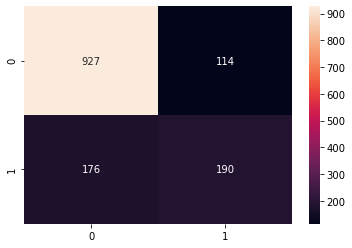

In [98]:
sns.heatmap(cm, annot = True, fmt = 'd')